# Loan defaulting risk analysis

In this project I will analyze the risk that a customer of a bank will default on a loan. The report will assist the loans devision of the bank in creating the credit scores of new potential customers, which are used to evaluate a borrower's ability to repay loans.
I will focus on finding the effect of the following parameters of the borrower on the defaulting probability:
- Number of children
- Income level
- Loan purpose
- Family status

To reach the conclusions, I will use existing data that was collected by the bank on the credit worthiness of its customers.

## Loading data & identifying problems

In [2]:
# Importing the required libraries
import math # For mathematical tools
import numpy as np # For mathematical tools, especially arrays
import pandas as pd # For general data analysis tools
import nltk # For text manipulation tools
import matplotlib.pyplot as plt # For 2D plotting

# Text manipulation extra tools
nltk.download('punkt') # Downloading a required package for tokenizing
nltk.download('wordnet') # Downloading a required package for lemmatizing
wordnet_lemma = nltk.WordNetLemmatizer()
# from nltk.stem import SnowballStemmer # For text stemming
# from nltk.stem import WordNetLemmatizer # For text lemmatization

# Selecting the type of runtime and loading the data file
# Three types of runtimes are supported: 1 - A local runtime. 2 - A hosted runtime on the interactive Yandex platform. 3 - A hosted runtime on Google colaboratory. 
runtime_type = 3 # 1 - Local runtime. 2 - Yandex interactive platform. 3 - Google colaboratory.

# Setting filepaths
filepath_local = 'credit_scoring_eng.csv'
filepath_hosted_yandex_platform = '/datasets/credit_scoring_eng.csv'
filepath_hosted_google_colab = '/content/drive/My Drive/Colab Notebooks/Yandex Practicum/'

# Loading the data
if runtime_type == 1:
    print('A local runtime was chosen.\n')
    data = pd.read_csv(filepath_local)

elif runtime_type == 2:
    print('A hosted runtime on Yandex interactive platform was chosen.\n')
    data = pd.read_csv(filepath_hosted_yandex_platform)

elif runtime_type == 3:
    print('A hosted runtime on Google colaboratory was chosen.\n')
    from google.colab import drive # For integration of files with Google drive
    drive.mount('/content/drive') # Mounting Google drive
    print()
    data = pd.read_csv(filepath_hosted_google_colab + 'credit_scoring_eng.csv')

else:
    print('Incorrect selection of a runtime type! Please set "runtime_type" to either "1", "2" or "3".')

# Looking at the general information
print('Starting to explore the data by printing its general information:')
print()
data.info()
print()
num_rows = len(data) # Calculating the number of rows in the data frame
print('There are {} rows in the data frame.'.format(num_rows))
print()
print('Printing some of the first rows:')
print()
print(data.head(20))
print()
print('Printing an example full row:')
print()
print(data.loc[0,:]) # Used to see all of the columns in one row
print()

# Studying the unique values in the columns with the categorical variables
print('Studying the unique values in the columns with the categorical variables:')
print()
print('Unique values in the "children" column:')
print(data['children'].value_counts())
print()
print('Unique values in the "education" column:')
print(data['education'].value_counts())
print()
print('Unique values in the "family_status" column:')
print(data['family_status'].value_counts())
print()
print('Unique values in the "gender" column:')
print(data['gender'].value_counts())
print()
print('Unique values in the "income_type" column:')
print(data['income_type'].value_counts())
print()
print('Unique values in the "debt" column:')
print(data['debt'].value_counts())
print()
print('Unique values in the "purpose" column:')
print(data['purpose'].value_counts())
print()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
A hosted runtime on Google colaboratory was chosen.

Mounted at /content/drive

Starting to explore the data by printing its general information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 

### Conclusion

We can identify some problems with the data right away, which we'll address in the following sections:
- The "children" column has negative values and some extremely large values. 
- The "days_employed" column has negative values and some extremely large values. It also has missing values relative to the amount of values in the other columns. In addition, its data type should be changed from "float64" to "int64".
- The "education" column has duplicate values, which have the same meaning but are differentiated by their capitalization.
- The "gender" column has a single missing value.
- The "total_income" column has missing values relative to the amount of values in the other columns. In addition, its data type should be changed from "float64" to "int64".
- The "purpose" column has duplicate values, which have the same meaning but are differentiated by their wording.

## Preprocessing data

### Processing incorrect values

Replacing the negative values by their absolute values.
Replacing the incorrect extreme values of "20" with "2".

Verifying the changes - Unique values in the "children" column:
[1 0 3 2 4 5]

Plotting a histogram of the values in the "days_employed" column to identify problems:



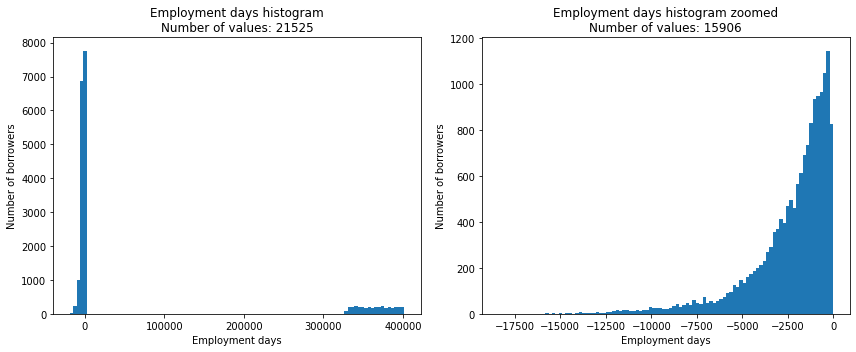


We immediately notice that there are negative values and extremely large values in the "days_employed" column.

Dealing with the negative values:
There are 21525 rows in the data frame.
The number of rows with negative employment days is 15906.

The following rows have this issue:
0       -8437.673028
1       -4024.803754
2       -5623.422610
3       -4124.747207
5        -926.185831
            ...     
21519   -2351.431934
21520   -4529.316663
21522   -2113.346888
21523   -3112.481705
21524   -1984.507589
Name: days_employed, Length: 15906, dtype: float64

This issue can be fixed by taking the absolute value of the column.

Dealing with the extremely large values:
There are 21525 rows in the data frame.
The number of rows with over 100.0 years of employment time is 3445.

The following rows have this issue:
4        340266.072047
18       400281.136913
24       338551.952911
25       363548.489348
30       335581.668515
             ...      
21505    338904.866406
21508    386497.7

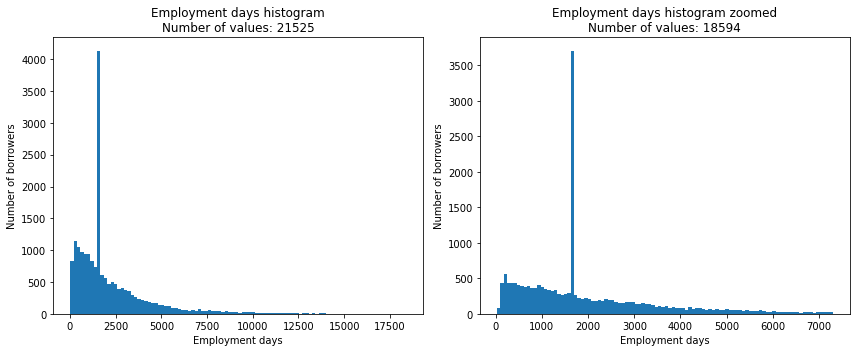

In [3]:
# Processing incorrect values

num_rows = len(data)

# Treating the "children" column
print('Replacing the negative values by their absolute values.')
data['children'] = abs(data['children'])
print('Replacing the incorrect extreme values of "20" with "2".')
print()
data.loc[data['children'] == 20, 'children'] = 2

# Verifying the changes
print('Verifying the changes - Unique values in the "children" column:')
print(data['children'].unique())
print()

# Treating the "days_employed" column
# Plotting a histogram of the values in the "days_employed" column
print('Plotting a histogram of the values in the "days_employed" column to identify problems:')
print()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes[0].hist(data['days_employed'], bins=100)
axes[0].set_title('Employment days histogram\nNumber of values: {}'.format(num_rows))
axes[0].set_ylabel('Number of borrowers')
axes[0].set_xlabel('Employment days')

low_vals = data.loc[data['days_employed'] < 365*20, 'days_employed']
axes[1].hist(low_vals, bins=100)
axes[1].set_title('Employment days histogram zoomed\nNumber of values: {}'.format(len(low_vals)))
axes[1].set_ylabel('Number of borrowers')
axes[1].set_xlabel('Employment days')

plt.tight_layout()
plt.show()
print()

print('We immediately notice that there are negative values and extremely large values in the "days_employed" column.')
print()

# Treating the negative values
print('Dealing with the negative values:')
print('There are {} rows in the data frame.'.format(num_rows))
print('The number of rows with negative employment days is {}.'.format(len(data.loc[data['days_employed'] < 0, :])))
print()
print('The following rows have this issue:')
print(data.loc[data['days_employed'] < 0, 'days_employed'])
print()
print('This issue can be fixed by taking the absolute value of the column.')
data['days_employed'] = abs(data['days_employed'])
print()

# Dealing with the extremely big values
print('Dealing with the extremely large values:')
print('There are {} rows in the data frame.'.format(num_rows))
employment_days_threshold = 100*365
print('The number of rows with over {} years of employment time is {}.'.format(employment_days_threshold/365, len(data.loc[data['days_employed'] > employment_days_threshold, :])))
print()
print('The following rows have this issue:')
print(data.loc[data['days_employed'] > employment_days_threshold, 'days_employed'])
print()

# Processing the extremely big values in the "days_employed" column
print('We can replace the incorrect extremely big values with the median number of correct employment days, since the distribution isn\'t symmetric and has outliers.')
print()
days_employed_median = data.loc[data['days_employed'] < employment_days_threshold, 'days_employed'].median()
data.loc[data['days_employed'] > employment_days_threshold, 'days_employed'] = days_employed_median

# print('We can convert the incorrect extremely big values, assuming they were input as minutes instead of days.')
# print()
# data.loc[data['days_employed'] > employment_days_threshold, 'days_employed'] = data.loc[data['days_employed'] > employment_days_threshold, 'days_employed'] / 1440

print('Verifying the changes by checking the first 10 rows:')
print(data.head(10))
print()

# Plotting a histogram of the values in the "days_employed" column
print('Plotting a histogram of the values in the "days_employed" column to identify problems:')
print()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes[0].hist(data['days_employed'], bins=100)
axes[0].set_title('Employment days histogram\nNumber of values: {}'.format(num_rows))
axes[0].set_ylabel('Number of borrowers')
axes[0].set_xlabel('Employment days')

low_vals = data.loc[data['days_employed'] < 365*20, 'days_employed']
axes[1].hist(low_vals, bins=100)
axes[1].set_title('Employment days histogram zoomed\nNumber of values: {}'.format(len(low_vals)))
axes[1].set_ylabel('Number of borrowers')
axes[1].set_xlabel('Employment days')
plt.tight_layout()
plt.show()
print()

### Conclusion

I have identified 2 problems with the "children" columns:
- Some of the values were negative and had a reasonable absolute value.
- There was a smaller portion of extremely large positive values.

I have identified 2 problems with the "days_employed" columns:
- Many of the values were negative and had a reasonable absolute value.
- There was a small portion of borrowers with 20.

I have treated the problematic values as follows:
- I turned the nessecary negative values into positive by applying absolute value on the column.
- I replaced the incorrect extremely high values with the median of the correct employment days.
- I replaced the number of children "20" with "2".

The reasons for using these methods are:
- I replaced the negative values with their absolute values since there was a very large portion of such values, so I couldn't delete them, since that would effect the statistics too much.
- I replaced the incorrect extremely high values with the median of the correct employment days, since it seems like the most simple and fast solution that wouldn't ruin the data analysis later. When there's a small portion of incorrect values, its influence on the statistics could be neglected and it can be changed. I used the median since the distribution of the values isn't symmetric and has some outliers, and if the distribution doesn't have outliers then it's still fine to use the median. In particular, the mean and the median of a symmetric distribution are equal.
- I have also considered converting the high values of employment days, assuming they appear in minutes or in hours by mistake, instead of in days, but doing so gave values that don't fit the shape of the overall distribution of days. 
- I replaced the number of children "20" with "2" since this issue appeared in quite a few rows, and was the only very high value larger than 5, which makes it seem like a consistent typo, that could result from the fact that the "0" key is right under the "2" key on a keyboard.

The possible reasons for such issues could be one or both of:
- A technical error, such as a mistake in the formula calculating the number of employment days for some of the borrowers - the difference between the day the borrower started working and today was calculated, instead of the opposite. Another option could be that some of the values were stored in a database where they were seperated by minuses between them, and then they automatically copying the values along with the minuses.
- A human error, such as when a bank worker or a borrower input the data incorrectly, but it is unlikely for the employment days, due to the huge amount of rows with negative values. Regarding the high positive values, these might occur due to not being consistent and inputing a time duration with a different meaning, such as number of hours instead of days. Regarding the the number of children being "20", this could result from a typo, since the "0" key is right under the "2" key on a keyboard.

### Processing missing values

There are 21525 rows in the data frame.

The amounts of values per column are:
children            21525
days_employed       19351
dob_years           21525
education           21525
education_id        21525
family_status       21525
family_status_id    21525
gender              21525
income_type         21525
debt                21525
total_income        19351
purpose             21525
dtype: int64

The amounts of missing values per column are:
children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

The amounts of null values per column are:
children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender           

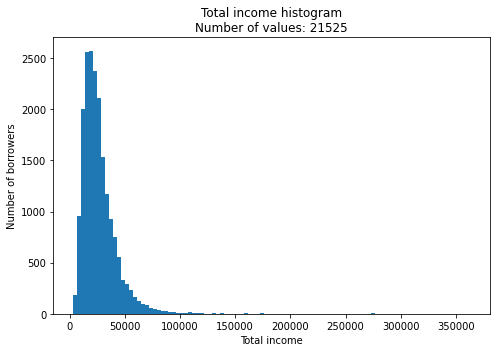


Verifying the changes by checking the general information, to see that no missing values remain:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB

Verifying the changes by checking a row with missing values:
children   

In [4]:
# Processing missing values

# Treating the missing values in the "days_employed" and "total_income" columns
num_rows = len(data) # Calculating the number of rows in the data frame
data_only_na_rows = data.loc[pd.isna(data['total_income'])] # A data frame with the rows with missing values
data_no_na_rows = data.loc[pd.notna(data['total_income'])] # A data frame with the rows without missing values

print('There are {} rows in the data frame.'.format(num_rows))
print()
print('The amounts of values per column are:')
print(data.count())
print()

print('The amounts of missing values per column are:')
print(data.isna().sum())
print()
print('The amounts of null values per column are:')
print(data.isnull().sum())
print()
print('We see that all of the missing values are actually nulls.')
print()

print('We can verify the amounts of missing values per column, by subtracting the number of values per column from the total number of rows:')
print(num_rows - data.count())
print()

print('Printing the rows with missing values:')
print(data_only_na_rows)

print()
print('Taking a closer look an example row with missing values, to see all of its columns.')
print(data.loc[12, :])
print()

# Checking for a correlation between the 2 columns with missing data
# Creating a series with a "1" in rows wherein both the "days_employed" and "total_income" columns have a missing value, and a "0" otherwise
data_both_missing = data['days_employed'].isna().astype(int) * data['total_income'].isna().astype(int)

# Calculating how many rows have a missing value in both the "days_employed" and "total_income" columns
num_rows_both_missing = data_both_missing.sum()
print('There are {} rows wherein both the "days_employed" and "total_income" columns have a missing value.'.format(num_rows_both_missing))
print('We see that the amount of rows with missing values equals the amount of rows wherein both the "days_employed" and "total_income" columns have a missing value. Therefore we can assume that the corresponding borrowers are unemployed, and fill all of these missing values with "0"s.')
print()

# Checking the income type in the rows that have a missing value in both the "days_employed" and "total_income" columns
print('Checking the income type in the rows wherein both the "days_employed" and "total_income" columns have a missing value.')
print(data_only_na_rows['income_type'].value_counts())
print()
print('We see that the missing values don\'t only appear for unemployed borrowers, so they shouldn\'t be simply replaced with zeros.')
print()

# Plotting a histogram of the values in the "total_income" column
print('Plotting a histogram of the values in the "total_income" column:')
print()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
axes.hist(data_no_na_rows['total_income'], bins=100)
axes.set_title('Total income histogram\nNumber of values: {}'.format(num_rows))
axes.set_ylabel('Number of borrowers')
axes.set_xlabel('Total income')
plt.tight_layout()
plt.show()
print()

# Filling the missing values
data['days_employed'] = data['days_employed'].fillna(data_no_na_rows['days_employed'].median())
data['total_income'] = data['total_income'].fillna(data_no_na_rows['total_income'].median())

# Verifying the changes
print('Verifying the changes by checking the general information, to see that no missing values remain:')
data.info()
print()

print('Verifying the changes by checking a row with missing values:')
print(data.loc[12, :])
print()

# Treating the missing values in the "gender" column
print('Removing the row with a missing gender, since there\'s only one of those, so it\'s effect on the statistics is negligible.')
print()
data.loc[data['gender'] == 'XNA', 'gender'] = math.nan
data = data.dropna().reset_index(drop = True)

# Verifying the changes
print('Verifying the changes by checking the general information, to see that no missing values remain:')
data.info()
print()

### Conclusion

I have identified 2 columns with actual missing values, "days_employed" and "total_income", both of which have "float64" type variables.
I have also identified a column with a missing value that was labeled - the "gender" column.

The possible reasons that these missing values were present are:
- A simple reason for the missing values could be that the borrowers didn't know these values at the time of supplying the data, so they didn't fill them, planning to do so after verifying their values.
- The gender can be missing for a person with a non-binary gender.
- Both of the real variables can be missing if the corresponding borrowers are unemployed. This hypothesis is supported by the fact that the same amounts of values are missing in both columns. With further inspection, we see that the amount of rows with missing values equals the amount of rows wherein both the "days_employed" and "total_income" columns have a missing value. With even more inspection, we see that the missing values don't only appear for unemployed borrowers, so they shouldn't be simply replaced with zeros.
- Another reason could be a technical issue that prevented the saving of the values after they were input.
- Another less likely reason for the missing values could be that they weren't input when collecting the data, either by a bank employee or the borrower, because they overlooked them or forgot to do so, but again, this is more unlikely.

I used the "fillna" method to fill in the real missing values with the median value of the corresponding columns, since the distribution of the values isn't symmetric and has some outliers, and if the distribution doesn't have outliers then it's still fine to use the median. In particular, the mean and the median of a symmetric distribution are equal.
I removed the row with the missing gender, since there's only one of those, so it's effect on the statistics is negligible.

### Replacing data types

In [5]:
# Replacing data types
print('Checking the data types by looking at the general information:')
print(data.info())
print()
print('Printing an example row:')
print(data.loc[0,:])
print()

print('The following columns contain real variables but should contain integers: "days_employed" and "total_income".')
print()
data['days_employed'] = data['days_employed'].astype('int64')
data['total_income'] = data['total_income'].astype('int64')

print('Verifying the data type changes by checking the general information:')
data.info()

Checking the data types by looking at the general information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21524 entries, 0 to 21523
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21524 non-null  int64  
 1   days_employed     21524 non-null  float64
 2   dob_years         21524 non-null  int64  
 3   education         21524 non-null  object 
 4   education_id      21524 non-null  int64  
 5   family_status     21524 non-null  object 
 6   family_status_id  21524 non-null  int64  
 7   gender            21524 non-null  object 
 8   income_type       21524 non-null  object 
 9   debt              21524 non-null  int64  
 10  total_income      21524 non-null  float64
 11  purpose           21524 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None

Printing an example row:
children                                1
days_employed                     8

### Conclusion

I used the "astype" method to change the type of the "days_employed" and "total_income" columns from "float64" to "int64", since it's more simple and isn't really required to view them as real numbers for the purposes of this project.
I note that another approach is using the "float64" data type for the "total_income" and the "debt" columns, since an amount of money can get a real value.

I chose the "64" size since it fits 99% of the cases according to the course, and can be used when the data set isn't too huge and we don't have a constraint of saving space.

I used the "astype" method since it can be easily applied to COLUMNS in the data, while specifying the desired data type, but I could've used the "pd.to_numeric" function just as well, and specify the data types with the "downcast" attribute.

### Processing duplicates

In [6]:
# Processing duplicate data

# Changing the strings in the "education" column to be lowercase, to help find duplicates
data['education'] = data['education'].str.lower()

# Changing the strings in the "purpose" column, to help find duplicates
# Defining a function for unifying the purpose categories which have the same meaning but different wording  
def categorize_purpose(purpose):
    '''
    Given a string with a loan purpose, returns a string with the category of the purpose.
    For example: 'buying a car' -> 'car'.
    '''
    # Tokenizing
    purpose_tokenized = nltk.word_tokenize(purpose)
    # Lemmatizing
    purpose_tokenized_lemmatized = [wordnet_lemma.lemmatize(word, pos = 'n') for word in purpose_tokenized]
    # Categorizing
    if 'car' in purpose_tokenized_lemmatized:
        purpose_category = 'car'
    elif ('education' in purpose_tokenized_lemmatized) or ('educated' in purpose_tokenized_lemmatized) or ('university' in purpose_tokenized_lemmatized):
        purpose_category = 'education'
    elif ('house' in purpose_tokenized_lemmatized) or ('housing' in purpose_tokenized_lemmatized):
        purpose_category = 'house'
    elif ('property' in purpose_tokenized_lemmatized) or ('real' in purpose_tokenized_lemmatized) or ('estate' in purpose_tokenized_lemmatized):
        purpose_category = 'real estate'
    elif 'wedding' in purpose_tokenized_lemmatized:
        purpose_category = 'wedding'
    else:
        purpose_category = 'None'
        if 0: # An option for print purposes that don't fit any category
            print('The following purpose doesn\'t fit any category:', purpose)
    return purpose_category

# Using the purpose categorization function
print('Using a purpose categorization function.')
print()

data['purpose'] = data['purpose'].apply(categorize_purpose)

print('The unique values in the "purpose" column are:')
print(data['purpose'].value_counts())
print()

# Looking for duplicated rows
print('The following rows are duplicated:')
print(data.duplicated())
print()

num_duplicated_before = data.duplicated().sum()
print('The total number of duplicated rows is {}.'.format(num_duplicated_before))
print()

# Removing the duplicated rows and resetting the index
data = data.drop_duplicates().reset_index(drop = True)

# Verifying that the duplicated rows were removed
num_duplicated_after = data.duplicated().sum()
print('After removing the duplicated rows, the total number of duplicated rows is {}.'.format(num_duplicated_after))
print()

print('Looking at the general information to verify the changes:')
data.info()
print()
num_rows_no_dup = len(data)
print('We used to have {} rows, removed 1 row with undefined gender, and removed {} duplicated rows.'.format(num_rows, num_duplicated_before))
print('After removing the duplicated rows, the number of rows equals to excatly the difference: {}.'.format(num_rows_no_dup))

# Looking for duplicate text

Using a purpose categorization function.

The unique values in the "purpose" column are:
real estate    7019
car            4315
education      4022
house          3820
wedding        2348
Name: purpose, dtype: int64

The following rows are duplicated:
0        False
1        False
2        False
3        False
4        False
         ...  
21519    False
21520    False
21521    False
21522    False
21523    False
Length: 21524, dtype: bool

The total number of duplicated rows is 321.

After removing the duplicated rows, the total number of duplicated rows is 0.

Looking at the general information to verify the changes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21203 entries, 0 to 21202
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21203 non-null  int64 
 1   days_employed     21203 non-null  int64 
 2   dob_years         21203 non-null  int64 
 3   education         21203 non-

### Conclusion

I used the "duplicated" and "drop_duplicates" methods to find and delete the duplicate data, respectively. I applied them after:
- Changing the strings in the "education" column to be lowercase, which we saw contains duplicate values which are differentiated by their capitalization.
- Unifying the categories in the "purpose" column which have the same meaning but are differentiated by their wording.

I used these methods since the data set is too big to handle the duplicates manually, while the methods can automatically find and remove the duplicates, and the only adjustment required after the removal is resetting the indices, since the indices of the duplicated rows are deleted as well.

The presence of the duplicated data could've arised from one or both of:
- A technical error, such as copying the information of a borrower twice, or automatically changing the capitalization to a different format.
- A human error, such as not using a consistent method for capitalization or for wording, as we saw. Another option is that a bank worker or a borrower might have input the same data twice, thinking that the data wasn't received in the first time. Another scenario is a worker trying to add an updated borrower data, without deleting the previous copy of the data and without noticing that the data remained the same and didn't require an update to begin with.

### Categorizing data

In [7]:
# Categorizing the data

# Creating dictionaries
education_dic = data[['education_id','education']]
family_status_dic = data[['family_status_id','family_status']]
print('Two dictionaries were created for columns with category names that correspond to particular numbers - a dictionary for the education type and the family status.')
print()

# Checking dictionaries
print('Checking if there\'s a one-to-one correspondence between the values in both columns for each dictionary:')
print()
print('Education dictionary unique values:')
print(education_dic['education_id'].unique())
print()
print(education_dic['education'].unique())
print()

print('Family status dictionary unique values:')
print(family_status_dic['family_status_id'].unique())
print()
print(family_status_dic['family_status'].unique())
print()

# Removing the duplicate rows in the dictionaries
education_dic['education'] = education_dic['education'].str.lower()
education_dic = education_dic.drop_duplicates().reset_index(drop=True)
family_status_dic = family_status_dic.drop_duplicates().reset_index(drop=True)

# Printing the final dictionaries
print('Printing the final dictionaries:')
print()
print('Education dictionary:')
print(education_dic)
print()
print('Family status dictionary:')
print(family_status_dic)
print()

Two dictionaries were created for columns with category names that correspond to particular numbers - a dictionary for the education type and the family status.

Checking if there's a one-to-one correspondence between the values in both columns for each dictionary:

Education dictionary unique values:
[0 1 2 3 4]

["bachelor's degree" 'secondary education' 'some college'
 'primary education' 'graduate degree']

Family status dictionary unique values:
[0 1 2 3 4]

['married' 'civil partnership' 'widow / widower' 'divorced' 'unmarried']

Printing the final dictionaries:

Education dictionary:
   education_id            education
0             0    bachelor's degree
1             1  secondary education
2             2         some college
3             3    primary education
4             4      graduate degree

Family status dictionary:
   family_status_id      family_status
0                 0            married
1                 1  civil partnership
2                 2    widow / widow

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Conclusion

I have selected the following dictionaries for the data set:
- An education type dictionary.
- A family status dictionary.

I have chosen these dictionaries since they contain category names that correspond to particular numbers,
and can therefore assist with working with simple numerical categories instead of with long strings.

## Analyzing data

### 1) Number of kids

- Is there a relation between having kids and repaying a loan on time?

In [8]:
# Checking if there's a relation between having kids and repaying a loan on time

# Exploring the relevant data
print('Exploring the relevant data:')
print()

num_borrowers = len(data)

print('There are {} rows in the data frame.'.format(num_borrowers))
print()
print('The unique values in the "children" column are:')
print(data['children'].value_counts())
print()
print('The unique values in the "debt" column are:')
print(data['debt'].value_counts())
print()

array_children_sorted = np.sort(data['children'].unique())
series_children_debt_grouped = data.groupby(['children','debt'])['debt'].count()
series_debt_children_grouped = data.groupby(['debt','children'])['debt'].count()
# Adding a row that shows that no borrowers with 5 children defaulted on a loan
series_children_debt_grouped.loc[5, 1] = 0
series_debt_children_grouped.loc[1, 5] = 0

no_children = data['children'].value_counts().loc[0]
yes_children = data['children'].value_counts().loc[1:].sum()
no_debt = data['debt'].value_counts().loc[0]
yes_debt = data['debt'].value_counts().loc[1]

no_debt_no_children = series_debt_children_grouped.loc[0].loc[0]
no_debt_yes_children = series_debt_children_grouped.loc[0].loc[1:].sum()
yes_debt_no_children = series_debt_children_grouped.loc[1].loc[0]
yes_debt_yes_children = series_debt_children_grouped.loc[1].loc[1:].sum()

print('Number of borrowers with different amounts of children, who defaulted and who didn\'t:')
print(series_children_debt_grouped)
print()
print(series_debt_children_grouped)
print()

print('Number of borrowers without children:', no_children)
print('Number of borrowers with children:', yes_children)
print()
print('Number of borrowers who didn\'t default:', no_debt)
print('Number of borrowers who defaulted:', yes_debt)
print()

print('Number of borrowers who didn\'t default and don\'t have children:', no_debt_no_children)
print('Number of borrowers who didn\'t default and have children:', no_debt_yes_children)
print()
print('Number of borrowers who defaulted and don\'t have children:', yes_debt_no_children)
print('Number of borrowers who defaulted and have children:', yes_debt_yes_children)
print()

# Calculating statistics
print('Calculating statistics:')
print()
print('Percent of borrowers who didn\'t default and don\'t have children: {:.2%}'.format(no_debt_no_children / num_borrowers))
print('Percent of borrowers who didn\'t default and have children: {:.2%}'.format(no_debt_yes_children / num_borrowers))
print()
print('Percent of borrowers who defaulted and don\'t have children: {:.2%}'.format(yes_debt_no_children / num_borrowers))
print('Percent of borrowers who defaulted and have children: {:.2%}'.format(yes_debt_yes_children / num_borrowers))
print()

print('Percent of borrowers who don\'t have children out of borrowers who didn\'t default: {:.2%}'.format(no_debt_no_children / no_debt))
print('Percent of borrowers who have children out of borrowers who didn\'t default: {:.2%}'.format(no_debt_yes_children / no_debt))
print()
print('Percent of borrowers who don\'t have children out of borrowers who defaulted: {:.2%}'.format(yes_debt_no_children / yes_debt))
print('Percent of borrowers who have children out of borrowers who defaulted: {:.2%}'.format(yes_debt_yes_children / yes_debt))
print()

print('Percent of borrowers who didn\'t default out of borrowers who don\'t have children: {:.2%}'.format(no_debt_no_children / no_children))
print('Percent of borrowers who defaulted out of borrowers who don\'t have children: {:.2%}'.format(yes_debt_no_children / no_children))
print()
print('Percent of borrowers who didn\'t default out of borrowers who have children: {:.2%}'.format(no_debt_yes_children / yes_children))
print('Percent of borrowers who defaulted out of borrowers who have children: {:.2%}'.format(yes_debt_yes_children / yes_children))
print()

print('Given that a borrower has a certain number of children, the probability he would default on a loan is:')
list_default_prob = []
for children in array_children_sorted:
    default_prob = series_children_debt_grouped.loc[children,1] / (series_children_debt_grouped.loc[children,0] + series_children_debt_grouped.loc[children,1])
    print('Given that a borrower has', children, 'children, the probability for defaulting is {:.2%}.'.format(default_prob))
    list_default_prob.append(default_prob)
print()

list_default_prob = [i * 100 for i in list_default_prob] # Changing probability format
series_default_prob_given_children = pd.Series(data=list_default_prob, index=array_children_sorted) # Saving to a series

print('Sorting the number of children by defaulting probability:')
print(series_default_prob_given_children.sort_values())
print()

Exploring the relevant data:

There are 21203 rows in the data frame.

The unique values in the "children" column are:
0    13888
1     4818
2     2118
3      329
4       41
5        9
Name: children, dtype: int64

The unique values in the "debt" column are:
0    19463
1     1740
Name: debt, dtype: int64

Number of borrowers with different amounts of children, who defaulted and who didn't:
children  debt
0         0       12826
          1        1062
1         0        4373
          1         445
2         0        1916
          1         202
3         0         302
          1          27
4         0          37
          1           4
5         0           9
          1           0
Name: debt, dtype: int64

debt  children
0     0           12826
      1            4373
      2            1916
      3             302
      4              37
      5               9
1     0            1062
      1             445
      2             202
      3              27
      4               4

### Conclusion

- Given that a borrower has 1-4 children, there's an average 9.18% chance that he would default on a loan, while if he doesn't have children, there's only a 7.64%. This amounts to a difference of 2.11%.
- Borrowers with 5 children didn't default a loan at all, but this is probably a lucky result, which would change when gathering a more representative amount of data about borrowers with 5 children.
- Once a borrower has children, having more children doesn't neccessarily increse the probability for defaulting.
- This can be explained by the simple fact that children add to the expenses of the borrower, making it harder for him to return his loans, but only slightly, since borrowers with children are also usually more responsible and more careful about getting into financial problems.
- Given that you have defaulted, there's a 38.94% chance that you have children (it's more likely that you don't have children).

### 2) Family status

- Is there a relation between marital status and repaying a loan on time?

In [9]:
# Checking if there's a relation between family status and repaying a loan on time

# Exploring the relevant data
print('Exploring the relevant data:')
print()

num_borrowers = len(data)
array_family_statuses_ABC_sorted = np.sort(data['family_status'].unique())
series_family_values = data['family_status'].value_counts()
series_debt_values = data['debt'].value_counts()

data_debt_family_grouped = data.groupby(['debt','family_status'])
data_family_debt_grouped = data.groupby(['family_status','debt'])
series_debt_family_grouped = data_debt_family_grouped['debt'].count()
series_family_debt_grouped = data_family_debt_grouped['debt'].count()

no_debt_family = series_debt_family_grouped.loc[0]
yes_debt_family = series_debt_family_grouped.loc[1]

print('There are {} rows in the data frame.'.format(num_borrowers))
print()
print('The unique values in the "family_status" column are:')
print(series_family_values)
print()
print('The unique values in the "debt" column are:')
print(series_debt_values)
print()

print('Number of borrowers with different family statuses, who defaulted and who didn\'t:')
print(series_debt_family_grouped)
print()
print(series_family_debt_grouped)
print()

# Calculating statistics
print('Calculating statistics:')
print()

print('Given that a borrower has a certain family status, the probability he would default on a loan is:')
list_default_prob = []
for family_status in array_family_statuses_ABC_sorted:
    default_prob = series_family_debt_grouped.loc[family_status,1] / (series_family_debt_grouped.loc[family_status,0] + series_family_debt_grouped.loc[family_status,1])
    print('Given that a borrower is a', family_status, ', the probability for defaulting is {:.2%}.'.format(default_prob))
    list_default_prob.append(default_prob)
print()

list_default_prob = [i * 100 for i in list_default_prob] # Changing probability format
series_default_prob_given_family = pd.Series(data=list_default_prob, index=array_family_statuses_ABC_sorted) # Saving to a series

print('Sorting the family statuses by defaulting probability:')
print(series_default_prob_given_family.sort_values())
print()

Exploring the relevant data:

There are 21203 rows in the data frame.

The unique values in the "family_status" column are:
married              12143
civil partnership     4126
unmarried             2792
divorced              1193
widow / widower        949
Name: family_status, dtype: int64

The unique values in the "debt" column are:
0    19463
1     1740
Name: debt, dtype: int64

Number of borrowers with different family statuses, who defaulted and who didn't:
debt  family_status    
0     civil partnership     3738
      divorced              1108
      married              11213
      unmarried             2518
      widow / widower        886
1     civil partnership      388
      divorced                85
      married                930
      unmarried              274
      widow / widower         63
Name: debt, dtype: int64

family_status      debt
civil partnership  0        3738
                   1         388
divorced           0        1108
                   1         

### Conclusion

- Family status can effect the probability to return a loan by a few percents - The difference between the maximal and minimal chances for debt are of 3.18%.
- The family status with the lowest probability to default on a loan is "widowers" with 6.63%, followed by "divorced" with 7.12%, "married" with 7.65%, "civil partnership" with 9.4% and "unmarried" with 9.81%.
- This can be explained by widower borrowers being usually older, and with relatively less financial commitments and problems, while unmarried borrowers are the opposite - they're younger and are still at the beginning of their financial road in life.

### 3) Income level

- Is there a relation between income level and repaying a loan on time?

Exploring the relevant data:

There are 21203 rows in the data frame.

The unique values in the "debt" column are:
0    19463
1     1740
Name: debt, dtype: int64

Plotting the values in the "total_income" column:


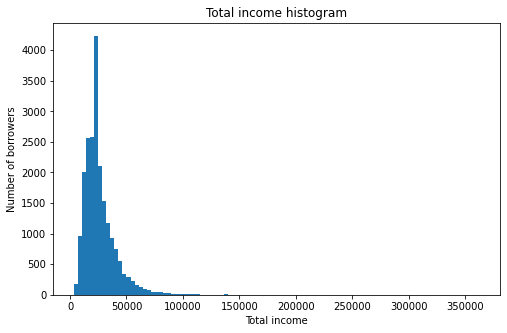


It would be much more informative to split the incomes into a smaller amount of discrete categories.

Adding a column with an income group.

The unique values in the "income_group" column are:
20k-30k    7915
10k-20k    6443
30k-40k    3106
40k-50k    1492
50k+       1320
0-10k       927
Name: income_group, dtype: int64

We see that the chosen groups have approximately the same order of magnitude of values in them.

Given that a borrower is in a certain income group, the probability he would default on a loan is:
Given that a borrower is in the income group 0-10k , the probability for defaulting is 6.26%.
Given that a borrower is in the income group 10k-20k , the probability for defaulting is 8.54%.
Given that a borrower is in the income group 20k-30k , the probability for defaulting is 8.79%.
Given that a borrower is in the income group 30k-40k , the probability for defaulting is 7.79%.
Given that a borrower is in the income group 40k-50k , the probability for defaulting is 6.84%.
Gi

In [10]:
# Checking if there's a relation between income level and repaying a loan on time

# Exploring the relevant data
print('Exploring the relevant data:')
print()

num_borrowers = len(data)

print('There are {} rows in the data frame.'.format(num_borrowers))
print()

print('The unique values in the "debt" column are:')
print(series_debt_values)
print()

print('Plotting the values in the "total_income" column:')
fig, axes = plt.subplots(figsize=(8,5))
axes.hist(data['total_income'], bins=100)
axes.set_title('Total income histogram')
axes.set_ylabel('Number of borrowers')
axes.set_xlabel('Total income')
plt.show()
print()

# Calculating statistics
print('It would be much more informative to split the incomes into a smaller amount of discrete categories.')
print()

# Adding a column with an income group
print('Adding a column with an income group.')
print()

def income_group(income):
    """
    The function returns the income group according to the income value, using the following rules:
    — '0-10k' for: income <= 10k
    — '10k-20k' for: 10k < income <= 20k
    — '20k-30k' for: 20k < income <= 30k
    — '30k-40k' for: 30k < income <= 40k
    — '40k-50k' for: 40k < income <= 50k
    — '50k+' for all other cases
    """
    if income <= 10000:
        return '0-10k'
    elif income <= 20000:
        return '10k-20k'
    elif income <= 30000:
        return '20k-30k'
    elif income <= 40000:
        return '30k-40k'
    elif income <= 50000:
        return '40k-50k'
    else:
        return '50k+'

data['income_group'] = data['total_income'].apply(income_group)

print('The unique values in the "income_group" column are:')
print(data['income_group'].value_counts())
print()
print('We see that the chosen groups have approximately the same order of magnitude of values in them.')
print()

# Grouping using the new column
series_income_group_debt_grouped = data.groupby(['income_group','debt'])['debt'].count()
array_income_group_sorted = np.sort(data['income_group'].unique())

# Printing statistics
print('Given that a borrower is in a certain income group, the probability he would default on a loan is:')
list_default_prob = []
for income_group in array_income_group_sorted:
    default_prob = series_income_group_debt_grouped.loc[income_group,1] / (series_income_group_debt_grouped.loc[income_group,0] + series_income_group_debt_grouped.loc[income_group,1])
    print('Given that a borrower is in the income group', income_group, ', the probability for defaulting is {:.2%}.'.format(default_prob))
    list_default_prob.append(default_prob)
print()

list_default_prob = [i * 100 for i in list_default_prob] # Changing probability format
series_default_prob_given_income_group = pd.Series(data=list_default_prob, index=array_income_group_sorted) # Saving to a series

print('Sorting the income groups by defaulting probability:')
print(series_default_prob_given_income_group.sort_values())
print()

### Conclusion

- Income level can change the probability for defaulting on a loan by up to 2.54%.
- Borrowers with the lowest and with the highest incomes, namely with incomes of 0-10k, 40k-50k & 50k+, have relatively lower probabilities to default on a loan, of 6.26%, 6.83% & 6.96%, respectively.
- Borrowers with medium incomes, namely with incomes of 10k-20k, 20k-30k & 30k-40k, have relatively higher probabilities to default on a loan, of 8.54%, 8.79% & 7.79%, respectively.
- A possible explanation for this can be that borrowers with lower incomes have a harder time to repay loans, so they're more careful with taking them. Meanwhile, borrowers with high incomes don't need to take too many loans, and have more financial options for returning them. The borrowers with the medium incomes on the other hand, may simply take more loans to begin with, and it's not very easy for them to return them, so they end up with higher chances for defaulting. 

### 4) Loan purpose

- How do different loan purposes affect on-time repayment of the loan?

In [11]:
# Checking if there's a relation between loan purposes and repaying a loan on time

# Exploring the relevant data
print('Exploring the relevant data:')
print()

num_borrowers = len(data)
array_purpose_ABC_sorted = np.sort(data['purpose'].unique())
series_purpose_values = data['purpose'].value_counts()
series_debt_values = data['debt'].value_counts()

data_debt_purpose_grouped = data.groupby(['debt','purpose'])
data_purpose_debt_grouped = data.groupby(['purpose','debt'])
series_debt_purpose_grouped = data_debt_purpose_grouped['debt'].count()
series_purpose_debt_grouped = data_purpose_debt_grouped['debt'].count()

no_debt_purpose = series_debt_purpose_grouped.loc[0]
yes_debt_purpose = series_debt_purpose_grouped.loc[1]

print('There are {} rows in the data frame.'.format(num_borrowers))
print()
print('The unique values in the "purpose" column are:')
print(series_purpose_values)
print()
print('The unique values in the "debt" column are:')
print(series_debt_values)
print()

print('Number of borrowers with different loan purposes, who defaulted and who didn\'t:')
print(series_debt_purpose_grouped)
print()
print(series_purpose_debt_grouped)
print()

# Calculating statistics
print('Calculating statistics:')
print()

print('Given that a borrower has a certain loan purpose, the probability he would default on a loan is:')
list_default_prob = []
for purpose in array_purpose_ABC_sorted:
    default_prob = series_purpose_debt_grouped.loc[purpose,1] / (series_purpose_debt_grouped.loc[purpose,0] + series_purpose_debt_grouped.loc[purpose,1])
    print('Given that the loan purpose of a borrower is', purpose, ', the probability for defaulting is {:.2%}.'.format(default_prob))
    list_default_prob.append(default_prob)
print()

list_default_prob = [i * 100 for i in list_default_prob] # Changing probability format
series_default_prob_given_purpose = pd.Series(data=list_default_prob, index=array_purpose_ABC_sorted) # Saving to a series

print('Sorting the loan purposes by defaulting probability:')
print(series_default_prob_given_purpose.sort_values())
print()

Exploring the relevant data:

There are 21203 rows in the data frame.

The unique values in the "purpose" column are:
real estate    6891
car            4272
education      3964
house          3770
wedding        2306
Name: purpose, dtype: int64

The unique values in the "debt" column are:
0    19463
1     1740
Name: debt, dtype: int64

Number of borrowers with different loan purposes, who defaulted and who didn't:
debt  purpose    
0     car            3870
      education      3594
      house          3514
      real estate    6365
      wedding        2120
1     car             402
      education       370
      house           256
      real estate     526
      wedding         186
Name: debt, dtype: int64

purpose      debt
car          0       3870
             1        402
education    0       3594
             1        370
house        0       3514
             1        256
real estate  0       6365
             1        526
wedding      0       2120
             1        186

### Conclusion

- Loan purpose can change the probability of defaulting on a loan by up to 2.62%.
- The loan purposes ordered in ascending order of their probability to default on a loan, are: house, real estate, wedding, education & car.
- A possible explanation is that loans for purposes such as "wedding", "education" and "car" are done by borrowers at the beginning of their financial road, plus such loans usually don't make up for their value and actually lose value, increasing the probability of defaulting. On the other hand, loans such as "house" and "real estate" are the exact opposite.

## General conclusion

We saw that the quality of the dataset was relatively low, as it contained many issues which we had to solve by preprocessing it. The types of issues that appeared were:

- Numerical values were negative although they're supposed to be non-negative.
- Numerical values were unreasonably large.
- Values were missing.
- Values that were supposed to be integers were real.
- Categorical values appeared in duplicate forms, having the same meaning but different capitalizations or wording.

These issues were solved as follows:

- I turned the nessecary negative values into positive.
- I replaced the incorrect extremely high values with the median of the correct values, or with a similarly looking number where a typo was suspected.
- I filled in the numerical missing values with the median value of the corresponding columns, and removed a row which belonged to a column with a single missing value.
- I changed the data type of values which were supposed to be integers, but were real.
- I deleted the rows of duplicate categorical values which appeared multiple times with different capitalizations or wording.

Following the preprocessing, we analyzed the data and concluded the following about the factors that effect the probability to return a loan:

- The factors that increase the probability of defaulting on a loan are, in ascending order: number of children, income level, loan purpose and family status.

- The number of children has the smallest effect on defaulting on a loan, where it's 2.11% more probable for a borrower with children to default relative to borrowers without children, and the chances are 9.18% and 7.64%, respectively.

- Income level can change the probability of defaulting on a loan by up to 2.54%. Borrowers with the lowest and highest incomes, of 0-10k, 40k-50k & 50k+, have lower chances of defaulting, of 6.68% on average. Borrowers with medium incomes, of 10k-20k, 20k-30k & 30k-40k, have higher chances, of 8.37% on average.

- Loan purpose can change the probability of defaulting on a loan by up to 2.62%. The purposes ordered in ascending order of their probability to default on a loan, are: house, real estate, wedding, education & car.

- Family status has the highest impact on the probability of defaulting on a loan, and can change it by up to 3.18%. The status with the lowest probability to default on a loan is "widowers" with 6.63%, followed by "divorced" with 7.12%, "married" with 7.65%, "civil partnership" with 9.4% and "unmarried" with 9.81%.